In [5]:
import opendatasets as od
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

## Exploratory Data Analysis for the entire Data

In [2]:
# Import performed
import opendatasets as od
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [3]:
# Import data
data=pd.read_csv("/Users/shreyasinha/Desktop/Applied data science/history-of-philosophy/philosophy_data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360808 entries, 0 to 360807
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   title                      360808 non-null  object
 1   author                     360808 non-null  object
 2   school                     360808 non-null  object
 3   sentence_spacy             360808 non-null  object
 4   sentence_str               360808 non-null  object
 5   original_publication_date  360808 non-null  int64 
 6   corpus_edition_date        360808 non-null  int64 
 7   sentence_length            360808 non-null  int64 
 8   sentence_lowered           360808 non-null  object
 9   tokenized_txt              360808 non-null  object
 10  lemmatized_str             360808 non-null  object
dtypes: int64(3), object(8)
memory usage: 30.3+ MB


In [4]:
data.head()

,title,author,school,sentence_spacy,sentence_str,original_publication_date,corpus_edition_date,sentence_length,sentence_lowered,tokenized_txt,lemmatized_str
0,Plato - Complete Works,Plato,plato,"What's new, Socrates, to make you leave your ...","What's new, Socrates, to make you leave your ...",-350,1997,125,"what's new, socrates, to make you leave your ...","['what', 'new', 'socrates', 'to', 'make', 'you...","what be new , Socrates , to make -PRON- lea..."
1,Plato - Complete Works,Plato,plato,Surely you are not prosecuting anyone before t...,Surely you are not prosecuting anyone before t...,-350,1997,69,surely you are not prosecuting anyone before t...,"['surely', 'you', 'are', 'not', 'prosecuting',...",surely -PRON- be not prosecute anyone before ...
2,Plato - Complete Works,Plato,plato,The Athenians do not call this a prosecution b...,The Athenians do not call this a prosecution b...,-350,1997,74,the athenians do not call this a prosecution b...,"['the', 'athenians', 'do', 'not', 'call', 'thi...",the Athenians do not call this a prosecution ...
3,Plato - Complete Works,Plato,plato,What is this you say?,What is this you say?,-350,1997,21,what is this you say?,"['what', 'is', 'this', 'you', 'say']",what be this -PRON- say ?
4,Plato - Complete Works,Plato,plato,"Someone must have indicted you, for you are no...","Someone must have indicted you, for you are no...",-350,1997,101,"someone must have indicted you, for you are no...","['someone', 'must', 'have', 'indicted', 'you',...","someone must have indict -PRON- , for -PRON- ..."


#### Number of sentences by the Original Publication

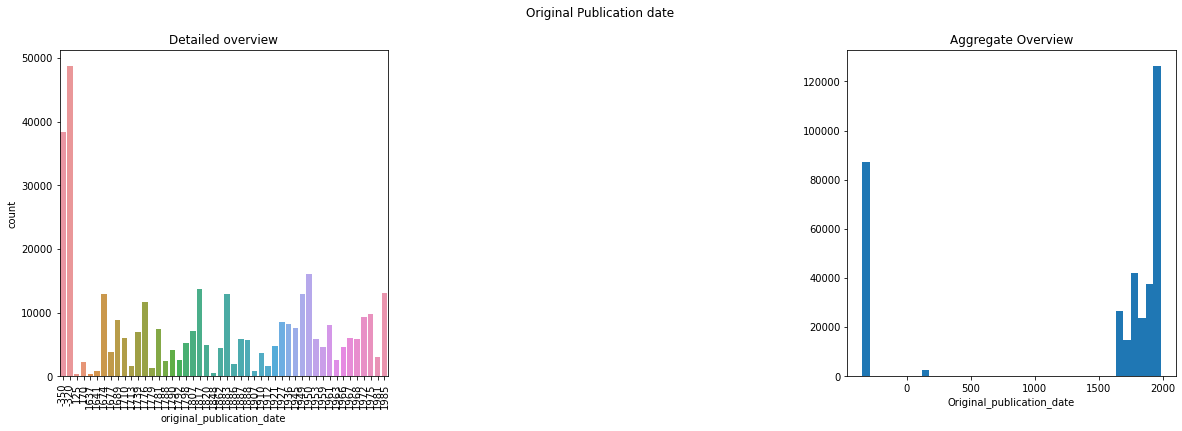

In [11]:
fig = plt.figure(figsize=(20, 6))
plt.subplot(1, 3, 1)
sns.countplot(x ='original_publication_date', data = data)
plt.xticks(rotation = 90)
plt.title("Detailed overview")


plt.subplot(1,3,3)
plt.hist(data['original_publication_date'],bins=40)
plt.xlabel('Original_publication_date')
plt.title("Aggregate Overview")

plt.suptitle("Original Publication date")
plt.show()

We see that most of the publications lie between -350bc to 1985.Most of the publications of Philosophers we study lie between 1800 to 2000  

#### Number of sentences in dataset for each author

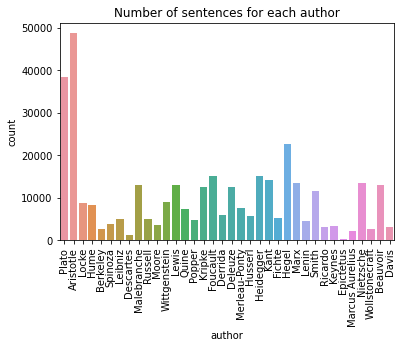

In [17]:
sns.countplot(x ='author', data = data)
plt.xticks(rotation = 90)
plt.title("Number of sentences for each author")
plt.show()

Maximum Sentences are of Aristotle and Plato in the dataset

#### Count of sentences of each school

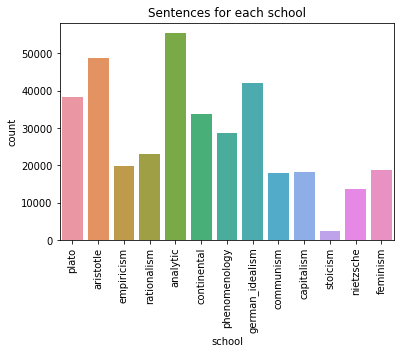

In [18]:
sns.countplot(x ='school', data = data)
plt.xticks(rotation = 90)
plt.title("Sentences for each school")
plt.show()

#### Authors original publications over time

Text(0.5, 1.0, 'Authors publications according to time')

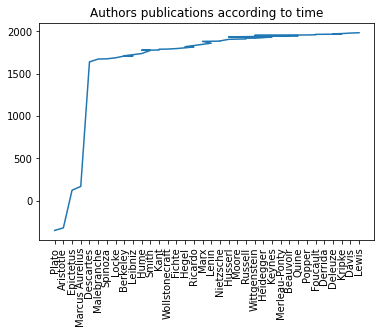

In [13]:
time_dat= data[['author','original_publication_date']]
time_dat=time_dat.drop_duplicates()
time_dat=time_dat=time_dat.sort_values(by=['original_publication_date'], ascending=True)
plt.plot(time_dat['author'],time_dat['original_publication_date'])
plt.xticks(rotation = 90)
plt.title("Authors publications according to time")

Here we see Plato is one of the oldest authors that we study and Lewis is the latest we are studying

# Topic to evaluate: Does Feminism concepts change over time?

Exploring the data I decided to explore the topic of Feminism as its philosophers have published in a relatively newer time and also number of sentences to explore are adequate. 




Feminism is a very important concept of bringing equality for both genders. Being an important concept its always debated upon. Hence I wanted to see from the Philosophers perspective does the concept change over time.


Before exploring the data I am of the preconception that the concepts do change over time. As females were given more freedom over time the concept might include a more of a bolder tone at a later stage than the previous times,However we will use data to explore that

## Data Preprocessing

## 1. Removal of Punctuation

In [27]:
#library that contains punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [28]:
data2=pd.DataFrame()

#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
#storing the puntuation free text
data2['rem_punc']= data['sentence_lowered'].apply(lambda x:remove_punctuation(x))


## 2. Tokenization

In [29]:
import re
def tokenization(text):
   tokens = re.split(' ',text)
   return tokens


In [30]:
data2['msg_tokenized']=data2['rem_punc'].apply(lambda x: tokenization(x))

## 3. Remove Stop words

In [31]:
#importing nlp library
import nltk
#Stop words present in the library
stopwords = nltk.corpus.stopwords.words('english')



In [32]:
#defining the function to remove stopwords from tokenized text
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output

In [33]:
#applying the function
data2['no_stopwords']= data2['msg_tokenized'].apply(lambda x:remove_stopwords(x))

# 4.Lemmatization

In [35]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

wordnet_lemmatizer = WordNetLemmatizer()

In [36]:
#defining the function for lemmatization
def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text


In [37]:
data2['msg_lemmatized']=data2['no_stopwords'].apply(lambda x:lemmatizer(x))

In [38]:
# Adding all columns to data2
data2['title']=data['title']
data2['author']=data['author']
data2['school']=data['school']
data2['original_publication_date']=data['original_publication_date']

In [42]:
# Filtering feminism 
data_fem=data2[data2['school']=='feminism']

In [43]:
data_fem.head()

,rem_punc,msg_tokenized,no_stopwords,msg_lemmatized,title,author,school,original_publication_date
342173,having read with great pleasure a pamphlet wh...,"[, having, read, with, great, pleasure, a, pam...","[, read, great, pleasure, pamphlet, lately, pu...","[, read, great, pleasure, pamphlet, lately, pu...",Vindication Of The Rights Of Woman,Wollstonecraft,feminism,1792
342174,but sir i carry my respect for your understand...,"[but, sir, i, carry, my, respect, for, your, u...","[sir, carry, respect, understanding, still, fa...","[sir, carry, respect, understanding, still, fa...",Vindication Of The Rights Of Woman,Wollstonecraft,feminism,1792
342175,and pardon my frankness but i must observe tha...,"[and, pardon, my, frankness, but, i, must, obs...","[pardon, frankness, must, observe, treated, cu...","[pardon, frankness, must, observe, treated, cu...",Vindication Of The Rights Of Woman,Wollstonecraft,feminism,1792
342176,i call upon you therefore now to weigh what i ...,"[i, call, upon, you, therefore, now, to, weigh...","[call, upon, therefore, weigh, advanced, respe...","[call, upon, therefore, weigh, advanced, respe...",Vindication Of The Rights Of Woman,Wollstonecraft,feminism,1792
342177,for my arguments sir are dictated by a disinte...,"[for, my, arguments, sir, are, dictated, by, a...","[arguments, sir, dictated, disinterested, spir...","[argument, sir, dictated, disinterested, spiri...",Vindication Of The Rights Of Woman,Wollstonecraft,feminism,1792


## Ecploratory data analysis of data with Feminism

/Users/shreyasinha/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/shreyasinha/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


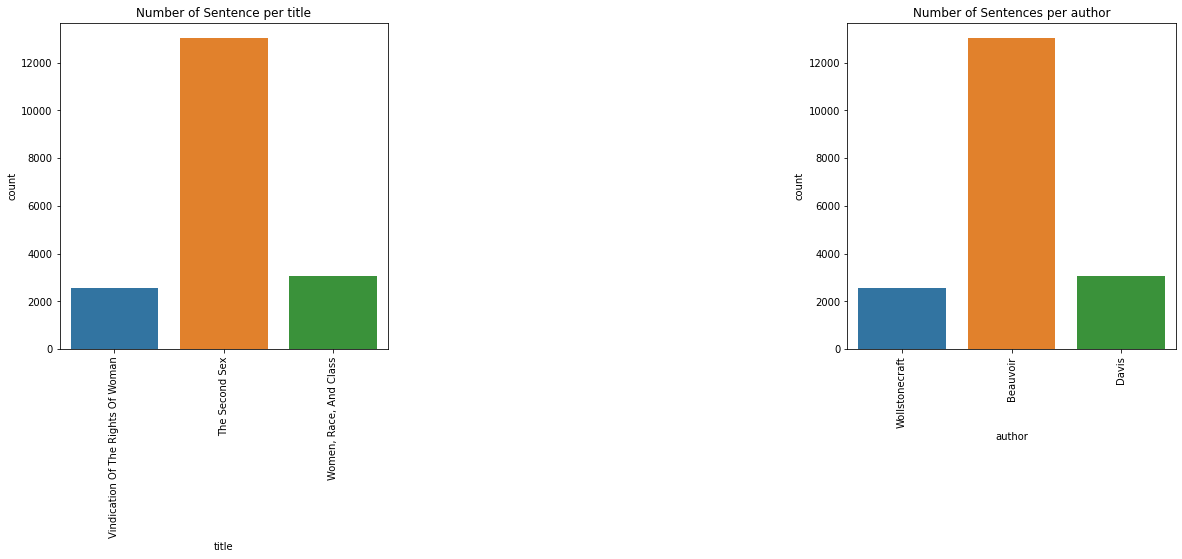

In [46]:
fig = plt.figure(figsize=(20, 6))
plt.subplot(1, 3, 1)
sns.countplot(data_fem['title'])
plt.title('Number of Sentence per title')
plt.xticks(rotation = 90)
    
    
plt.subplot(1, 3, 3)
sns.countplot(data_fem['author'])
plt.title('Number of Sentences per author')
plt.xticks(rotation = 90)
    
plt.show()    
    
    

In [48]:
data_fem_plot_pub_title=data_fem[['original_publication_date','title','author']]
data_fem_plot_pub_title=data_fem_plot_pub_title.drop_duplicates()
data_fem_plot_pub_title

,original_publication_date,title,author
342173,1792,Vindication Of The Rights Of Woman,Wollstonecraft
344732,1949,The Second Sex,Beauvoir
357749,1981,"Women, Race, And Class",Davis


Text(0.5, 1.0, 'Titles with dates')

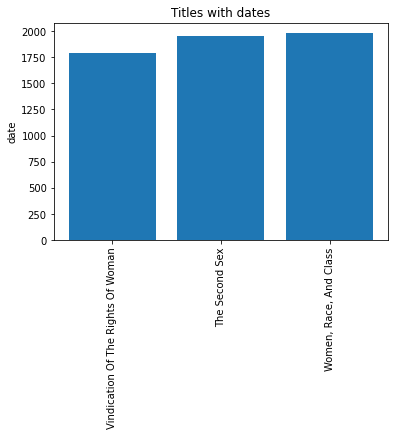

In [51]:
plt.bar(data_fem_plot_pub_title['title'],data_fem_plot_pub_title['original_publication_date'])
plt.xticks(rotation = 90)
plt.ylabel('date')
plt.title('Titles with dates')

Text(0.5, 1.0, 'Author with dates')

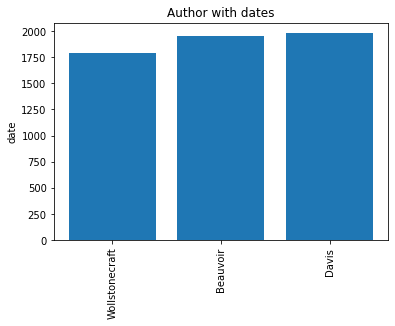

In [52]:
plt.bar(data_fem_plot_pub_title['author'],data_fem_plot_pub_title['original_publication_date'])
plt.xticks(rotation = 90)
plt.ylabel('date')
plt.title('Author with dates')

## WORDCLOUD

### Related to Title1:Vindication Of The Rights Of Woman

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud

In [65]:

title1=data_fem[data_fem['title']=='Vindication Of The Rights Of Woman']


In [66]:
list_msg_lemmatized=[]
for i in  title1['msg_lemmatized']:
    list_msg_lemmatized.extend(i)
dict_msg_lemmatized=pd.value_counts(list_msg_lemmatized)

In [67]:

print("Most frequently occuring words in:Vindication Of The Rights Of Woman")
print(dict_msg_lemmatized[0:20])

Most frequently occuring words in:Vindication Of The Rights Of Woman
woman        636
man          311
men          299
mind         286
virtue       272
reason       264
would        228
may          224
must         221
life         189
sex          172
duty         172
love         170
one          169
child        168
affection    159
every        153
make         153
heart        150
nature       147
dtype: int64


#### Here we see apart from Womaen men is the highest occuring word

In [44]:
word_cloud = WordCloud(width=1000,height=500,background_color = 'white').generate_from_frequencies(dict_msg_lemmatized)
word_cloud

(-0.5, 999.5, 499.5, -0.5)

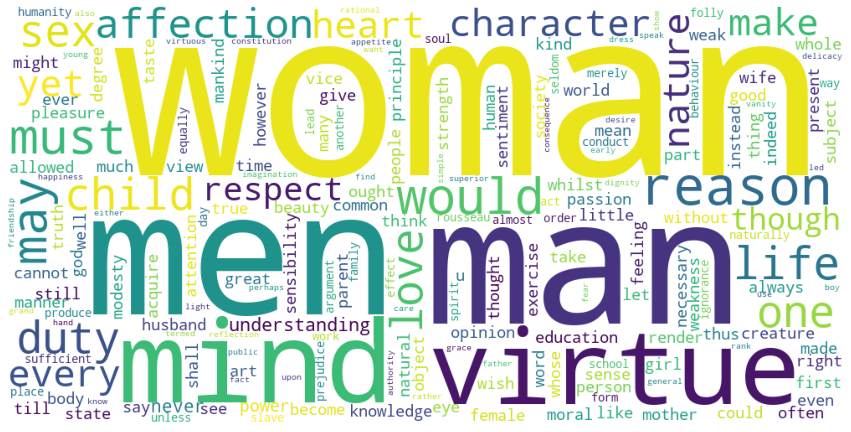

In [45]:
# Display the generated Word Cloud

plt.figure(figsize=(15,8))
plt.imshow(word_cloud)
plt.axis("off")



#### Here we see apart from woman , man is the most occuring word. We can see as its one of the olden occuring text words like dutry,virtue ,respect are used more in the context of women because only thats what had defined the character of women until that point. 

## Related to Topic 2: The Second sex

In [62]:
title2=data_fem[data_fem['title']=='The Second Sex']


In [63]:
list_msg_lemmatized2=[]
for i in  title2['msg_lemmatized']:
    list_msg_lemmatized2.extend(i)

In [64]:
dict_msg_lemmatized2=pd.value_counts(list_msg_lemmatized2)
print("Highest occuring words in the second sex")
print(dict_msg_lemmatized2[0:20])

Highest occuring words in the second sex
woman      4068
man        1465
one        1419
love        892
life        884
            790
girl        744
child       703
mother      672
like        658
even        654
men         643
male        640
would       626
husband     574
often       574
world       540
time        514
also        486
take        476
dtype: int64


(-0.5, 999.5, 499.5, -0.5)

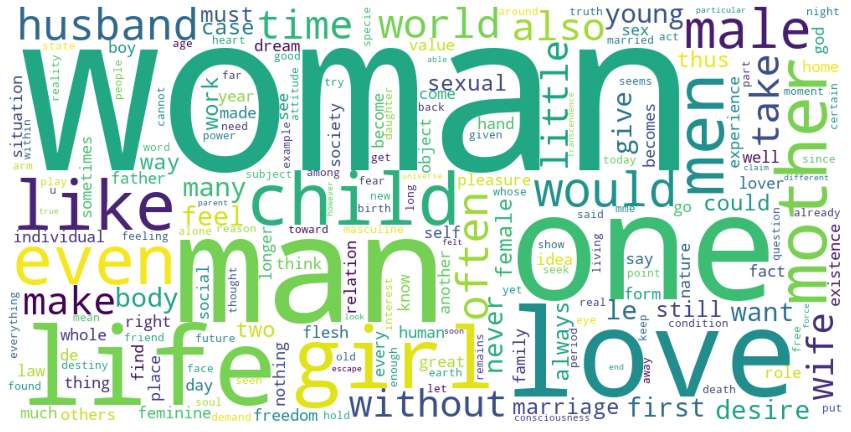

In [68]:
word_cloud2 = WordCloud(width=1000,height=500,background_color = 'white').generate_from_frequencies(dict_msg_lemmatized2)
# Display the generated Word Cloud

plt.figure(figsize=(15,8))

plt.imshow(word_cloud2)

plt.axis("off")

#### Here we see although men is used its prevelance is lesser. Also here to denote a woman very idealistic characteristics are not mentioned. Which shows some progress ins society. 

### Topic 3: Women,Race and class

In [69]:
title3=data_fem[data_fem['title']=='Women, Race, And Class']


In [70]:
list_msg_lemmatized3=[]
for i in  title3['msg_lemmatized']:
    list_msg_lemmatized3.extend(i)

In [71]:
dict_msg_lemmatized3=pd.value_counts(list_msg_lemmatized3)
print("Highest occuring words in Women,Race and class")
print(dict_msg_lemmatized3[0:20])

Highest occuring words in Women,Race and class
woman       1483
black        707
white        425
men          274
people       214
slave        212
right        211
slavery      192
one          188
movement     174
would        164
class        150
new          138
worker       134
could        134
work         128
well         127
suffrage     126
rape         124
year         122
dtype: int64


(-0.5, 999.5, 499.5, -0.5)

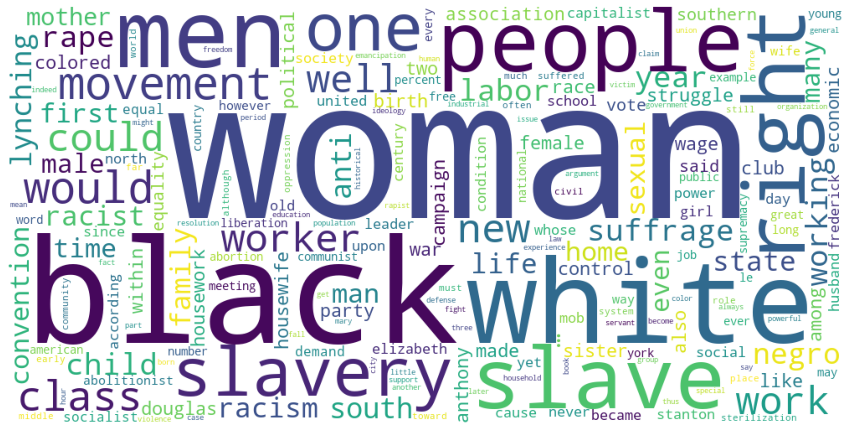

In [72]:
word_cloud3 = WordCloud(width=1000,height=500,background_color = 'white').generate_from_frequencies(dict_msg_lemmatized3)
# Display the generated Word Cloud

plt.figure(figsize=(15,8))

plt.imshow(word_cloud3)

plt.axis("off")

#### The prevelance of men is even lesser in this case. We can also see the word work and women as women startes getting associated with work here. However some of the reason of Bias could also be because this book is predominantly also related to slave trade and abolition movement related to women.

# Sentiment analysis

## Sentiment analysis part 1

In [75]:
nltk.download('vader_lexicon')

In [80]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [82]:
sid=SentimentIntensityAnalyzer()

In [96]:
#Joining sentence to get a row
def joining(x):
    my_sep=" "
    return(my_sep.join(x))

title1['joined_sentence']=title1['msg_lemmatized'].apply(lambda x: joining(x))

In [97]:
title1['scores']=title1['joined_sentence'].apply(lambda joined_sentence:
      sid.polarity_scores(joined_sentence)) 
title1['compound']=title1['scores'].apply(lambda d:d['compound'])
title1['comp_score']=title1['compound'].apply(lambda score:'pos' if score>=0 else 'neg')


In [84]:
title1['comp_score'].value_counts()

pos    1950
neg     609
Name: comp_score, dtype: int64

In [85]:
print("negative in comparison to positive is",609/(609+1950))   

negative in comparison to positive is 0.23798358733880423


### sentiment analysis part 2

In [98]:
title2['joined_sentence']=title2['msg_lemmatized'].apply(lambda x: joining(x))
title2['scores']=title2['joined_sentence'].apply(lambda joined_sentence:
      sid.polarity_scores(joined_sentence)) 
title2['compound']=title2['scores'].apply(lambda d:d['compound'])
title2['comp_score']=title2['compound'].apply(lambda score:'pos' if score>=0 else 'neg')

In [81]:
title2['comp_score'].value_counts()

pos    9261
neg    3756
Name: comp_score, dtype: int64

In [91]:
print("Negative in comparison to positive is", 3756/(3756+9261))

Negative in comparison to positive is 0.2885457478681724


## Sentiment analysis part 3

In [99]:
title3['joined_sentence']=title3['msg_lemmatized'].apply(lambda x: joining(x))
title3['scores']=title3['joined_sentence'].apply(lambda joined_sentence:
      sid.polarity_scores(joined_sentence)) 
title3['compound']=title3['scores'].apply(lambda d:d['compound'])
title3['comp_score']=title3['compound'].apply(lambda score:'pos' if score>=0 else 'neg')

In [93]:
title3['comp_score'].value_counts()

pos    1733
neg    1326
Name: comp_score, dtype: int64

In [95]:
print("Negative as compared to positive in this case is", 1326/(1326+1733))

Negative as compared to positive in this case is 0.4334749918273946


#### Here we see that Negative emotions have increased as compared to the positive emotions. The reason could be with time philosophy on women are more seriously looked upon. Or with time philosophers on feminism have more of a voice to express themselves than. before. 

## Conclusion

Through wordclouds we learnt that words like men were lessened with time as compared to the word women. We see words like "work" is used in the book 1981 whereas in the book in 1700's women was only described with idealistic qualities like affectionate ,virtue and wasnt given any oppurtunity to work. 

Also through sentiment analysis we learnt that the feminism authors used more negative words in later times(1900s) than before(1700s). The reason could be with time they got more comfortable with voicing their opinions. 

Hence our analysis that Feminism concept changes over time is proven right.